In [23]:
import sys  
sys.path.insert(0, '../../Utils')

In [24]:
from data_analys import *
import numpy as np

Это костыль :) По идее оно должно всё в одном окружении работать, но у меня не получилось так сделать. Так что библиотеки тут тоже устанавливаются

In [2]:
!pip install -U pip setuptools wheel
!pip install -U spacy
!pip install pandas
!pip install nltk
#!python -m spacy download en_core_web_trf --user
!python -m spacy download ru_core_news_lg --user

[+] Download and installation successful
You can now load the package via spacy.load('ru_core_news_lg')


Читаем данные. Параметром передается имя файла, функция ищет этот файл в папке "/Data/Russian Twitter Corpus/"

In [3]:
x = read_csv_clear('positive.csv')

Гистограмма распределения длинны твитов

In [4]:
import re

In [5]:
reg = re.compile('[^а-яА-Я]+')
for i,_ in enumerate(x[3]):
    x.at[i, 3] = reg.sub(' ', x.at[i, 3]).lower()

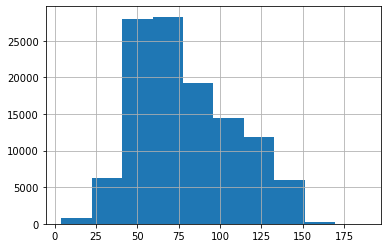

In [6]:
h = x['size'].hist()
fig = h.get_figure()

Боксплот

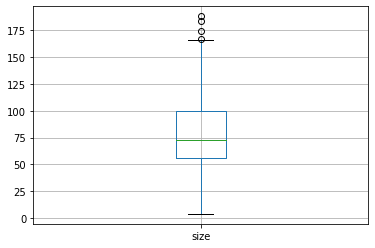

In [7]:
boxplot = x.boxplot(column=['size'])

Средняя длинна твита

In [8]:
averageNum = x.iloc[:, 1].mean()
averageNum

78.92663887704397

Медианная длинна твита

In [9]:
medianNum = x.iloc[:, 1].median()
medianNum

73.0

Среднеквадратичное отклонение

In [10]:
MeanSquare = np.std(x.iloc[:, 1])
MeanSquare

29.613165284084694

Подсчёт n-грамм слов. 10 самый популярных. Вот тут странно: видимо люди пишут смайлики через пробел, типа ") ) )" поэтому каждая скобочка считается отдельным словом. Похоже надо нормализовывать текст, а смайлики и тд обрабатывать отдельно(так делали в статье которую я чиатал)

In [11]:
dst = calculate_ngrams(x,3)
dst.most_common(10)

[("('^', 'у', 'меня')", 502),
 ("('^', 'а', 'я')", 341),
 ("('^', 'Доброе', 'утро')", 326),
 ("('^', 'У', 'меня')", 293),
 ("('за', 'то', 'что')", 229),
 ("('у', 'меня', 'есть')", 224),
 ("('^', 'А', 'я')", 214),
 ("('^', 'я', 'не')", 208),
 ("('на', 'новый', 'год')", 205),
 ("('^', 'я', 'тоже')", 201)]

Подсчёт n-грамм частей речи. 10 самых популярных

In [12]:
pos = POS_bigrams(x, 2)
pos.most_common(10)

[("('ADP', 'NOUN')", 59521),
 ("('NOUN', 'NOUN')", 47108),
 ("('ADJ', 'NOUN')", 42802),
 ("('NOUN', 'VERB')", 40486),
 ("('PRON', 'VERB')", 35865),
 ("('NOUN', 'ADP')", 35681),
 ("('VERB', 'NOUN')", 33945),
 ("('VERB', 'ADP')", 28673),
 ("('ADV', 'VERB')", 27074),
 ("('PART', 'VERB')", 26417)]

То же самое для негативных твитов

In [13]:
y = read_csv_clear('negative.csv')

In [14]:
reg = re.compile('[^а-яА-Я]+')
for i,_ in enumerate(y[3]):
    y.at[i, 3] = reg.sub(' ', y.at[i, 3]).lower()

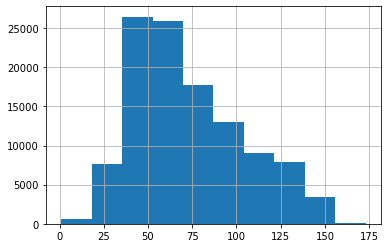

In [15]:
h2 = y['size'].hist()
fig2 = h2.get_figure()

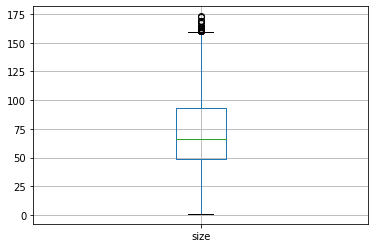

In [16]:
boxplotn = y.boxplot(column=['size'])

In [17]:
averageNumn = y.iloc[:, 1].mean()
averageNumn

72.96314430456653

In [18]:
medianNumn = y.iloc[:, 1].median()
medianNumn

66.0

In [19]:
MeanSquaren = np.std(y.iloc[:, 1])
MeanSquaren

30.967071343770197

In [20]:
dstn = calculate_ngrams(y,3)
dstn.most_common(10)

[("('^', 'у', 'меня')", 953),
 ("('о', 'О', '$')", 788),
 ("('^', 'Как', 'же')", 571),
 ("('а', 'у', 'меня')", 543),
 ("('^', 'У', 'меня')", 513),
 ("('^', 'а', 'я')", 470),
 ("('я', 'не', 'могу')", 426),
 ("('^', 'я', 'не')", 392),
 ("('не', 'могу', '$')", 385),
 ("('так', 'и', 'не')", 364)]

In [21]:
posn = POS_bigrams(y, 2)
posn.most_common(10)

[("('ADP', 'NOUN')", 55817),
 ("('NOUN', 'VERB')", 39846),
 ("('PART', 'VERB')", 39580),
 ("('NOUN', 'NOUN')", 37252),
 ("('PRON', 'VERB')", 35545),
 ("('ADJ', 'NOUN')", 33528),
 ("('VERB', 'NOUN')", 32339),
 ("('NOUN', 'ADP')", 30229),
 ("('VERB', 'ADP')", 29427),
 ("('ADV', 'VERB')", 28234)]